In [3]:
# for vedio 1

import pandas as pd
from pathlib import Path
import numpy as np
# assign directory
directory = '/content/labels'

def find(arr, value, threshold):
    diff = np.abs(arr - value)
    within_threshold = diff <= threshold
    if not np.any(within_threshold):
        return -1
    closest_idx = np.argmin(diff[within_threshold])
    original_idx = np.where(within_threshold)[0][closest_idx]
    return original_idx

# iterate over files in
# that directory
files = Path(directory).glob('*')
files=sorted(files)
a=len(files)
print(a)

all_data={}
thresh=0.1
prob_arrays = [[] for i in range(5)]
arr=np.array([0.25,0.33,0.69,0.51,0.75])
k=0;
for fil in files:
  data = pd.read_csv(fil,sep=' ',names=['class','xmax','ymax','xmin','ymin','probability'])
  data= data.sort_values(by=['xmax'], ascending=True)
  data['xmax']=data['xmax'].round(2)
  dic={}
  for i in range(len(data['xmax'])):
    if data['xmax'][i] in dic and dic[data['xmax'][i]][2]==0:
      dic[data['xmax'][i]]=(i,data['probability'][i],data['class'][i])
    elif data['xmax'][i] in dic and dic[data['xmax'][i]][2]==1:
      pass
    else:
      dic[data['xmax'][i]]=((i,data['probability'][i],data['class'][i]))

  for m in dic:
    ink=find(arr,m,thresh)
    if(ink!=-1):
      if(dic[m][2]==1):
        prob_arrays[ink].append(dic[m][1])
      else:
        if(len(prob_arrays[ink])==0):
          prob_arrays[ink].append(0.75)
        else:
          prob_arrays[ink].append(prob_arrays[ink][-1])
 

600


In [5]:
# for vedio 2

import pandas as pd
from pathlib import Path
import numpy as np
# assign directory
directory = '/content/labels3'

def find(arr, value, threshold):
    diff = np.abs(arr - value)
    within_threshold = diff <= threshold
    if not np.any(within_threshold):
        return -1
    closest_idx = np.argmin(diff[within_threshold])
    original_idx = np.where(within_threshold)[0][closest_idx]
    return original_idx

# iterate over files in
# that directory
files = Path(directory).glob('*')
files=sorted(files)
a=len(files)
print(a)

all_data={}
thresh=0.1
prob_arrays2 = [[] for i in range(4)]
arr=np.array([0.38,0.50,0.69,0.71])
k=0;
for fil in files:
  data = pd.read_csv(fil,sep=' ',names=['class','xmax','ymax','xmin','ymin','probability'])
  # x=(data.iloc[:,1:2].sum(axis=1)+data.iloc[:,3:4].sum(axis=1))/0.2
  # data['Sum'] = np.stack([data['xmax'], data['ymax'], data['xmin'],data['ymin']], axis=1).tolist()
  # data['Sum']=round(x,3)
  data= data.sort_values(by=['xmax'], ascending=True)
  data['xmax']=data['xmax'].round(2)
  dic={}
  for i in range(len(data['xmax'])):
    if data['xmax'][i] in dic and dic[data['xmax'][i]][2]==0:
      dic[data['xmax'][i]]=(i,data['probability'][i],data['class'][i])
    elif data['xmax'][i] in dic and dic[data['xmax'][i]][2]==1:
      pass
    else:
      dic[data['xmax'][i]]=((i,data['probability'][i],data['class'][i]))

  for m in dic:
    ink=find(arr,m,thresh)
    if(ink!=-1):
      if(dic[m][2]==1):
        prob_arrays2[ink].append(dic[m][1])
      else:
        if(len(prob_arrays2[ink])==0):
          prob_arrays2[ink].append(0.75)
        else:
          prob_arrays2[ink].append(prob_arrays2[ink][-1])


751


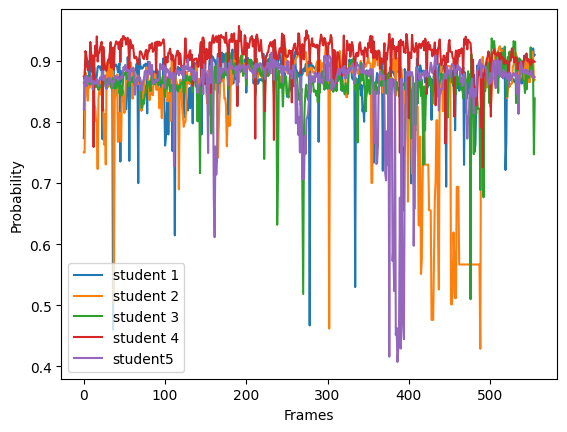

In [6]:
#vedio1
import numpy as np
import matplotlib.pyplot as plt

arr_tuple=prob_arrays

# Find the minimum length of the 5 arrays
min_len = min(len(arr_tuple[0]), len(arr_tuple[1]), len(arr_tuple[2]), len(arr_tuple[3]),len(arr_tuple[4]))

# Create an array of indices to use for plotting
indices = np.arange(min_len)

# Plot the 5 arrays with the minimum index only
plt.plot(indices, arr_tuple[0][:min_len])
plt.plot(indices, arr_tuple[1][:min_len])
plt.plot(indices, arr_tuple[2][:min_len])
plt.plot(indices, arr_tuple[3][:min_len])
plt.plot(indices, arr_tuple[4][:min_len])

# Add labels and legend
plt.xlabel('Frames')
plt.ylabel('Probability')
plt.legend(['student 1', 'student 2', 'student 3', 'student 4','student5'])

# Show the plot
plt.show()


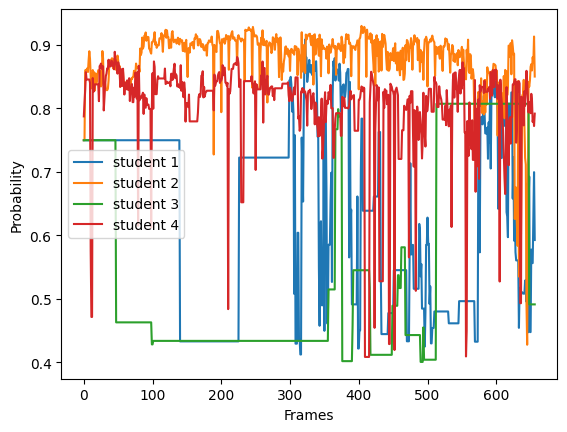

In [7]:
#vedio2
import numpy as np
import matplotlib.pyplot as plt

arr_tuple=prob_arrays2

# Find the minimum length of the 4 arrays
min_len = min(len(arr_tuple[0]), len(arr_tuple[1]), len(arr_tuple[2]), len(arr_tuple[3]))

# Create an array of indices to use for plotting
indices = np.arange(min_len)

# Plot the 5 arrays with the minimum index only
plt.plot(indices, arr_tuple[0][:min_len])
plt.plot(indices, arr_tuple[1][:min_len])
plt.plot(indices, arr_tuple[2][:min_len])
plt.plot(indices, arr_tuple[3][:min_len])

# Add labels and legend
plt.xlabel('Frames')
plt.ylabel('Probability')
plt.legend(['student 1', 'student 2', 'student 3', 'student 4'])

# Show the plot
plt.show()
